In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("dataset/ndvi-lluvia-tmin-tmax.csv")
df.head()

,anio,mes,ADM2_PCODE,departamento,municipio,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,date,tdelta
0,2002,7,GT0100,Guatemala,Lago De Amatitlan,1.0,0.686067,100.902100,-90.548878,14.435029,169.31514,16.139826,25.118555,2002-07-11,8.978729
1,2002,7,GT0101,Guatemala,Guatemala,6.0,0.586433,101.562333,-90.479418,14.635431,191.59773,15.752864,25.048338,2002-07-11,9.295474
2,2002,7,GT0102,Guatemala,Santa Catarina Pinula,2.0,0.707967,101.330167,-90.465079,14.564392,186.14903,14.537229,23.773886,2002-07-11,9.236657
3,2002,7,GT0103,Guatemala,San José Pinula,5.0,0.796333,100.334500,-90.346363,14.554316,199.11770,11.996284,20.399480,2002-07-11,8.403196
4,2002,7,GT0104,Guatemala,San José del Golfo,2.0,0.774200,98.992867,-90.372463,14.793193,135.58841,19.454800,28.777624,2002-07-11,9.322824


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81264 entries, 0 to 81263
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anio           81264 non-null  int64  
 1   mes            81264 non-null  int64  
 2   ADM2_PCODE     81264 non-null  object 
 3   departamento   81264 non-null  object 
 4   municipio      81264 non-null  object 
 5   n_pixels       81264 non-null  float64
 6   vim            81264 non-null  float64
 7   viq            81264 non-null  float64
 8   lon            81264 non-null  float64
 9   lat            81264 non-null  float64
 10  precipitacion  81264 non-null  float64
 11  tmin           81264 non-null  float64
 12  tmax           81264 non-null  float64
 13  date           81264 non-null  object 
 14  tdelta         81264 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 9.3+ MB


In [6]:
df.isna().sum(axis=0)

anio             0
mes              0
ADM2_PCODE       0
departamento     0
municipio        0
n_pixels         0
vim              0
viq              0
lon              0
lat              0
precipitacion    0
tmin             0
tmax             0
date             0
tdelta           0
dtype: int64

In [7]:
df.describe()

,anio,mes,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,tdelta
count,81264.000000,81264.000000,81264.000000,81264.000000,81264.000000,81264.000000,81264.000000,81264.000000,81264.000000,81264.000000,81264.000000
mean,2012.744955,6.569723,11.378470,0.714961,100.391691,-90.828353,14.929289,156.292752,14.651970,27.186788,12.534818
std,6.209488,3.451455,24.642132,0.111696,3.372495,0.798608,0.597030,159.071855,5.880862,5.183560,2.695169
min,2002.000000,1.000000,1.000000,0.249600,75.766933,-92.119786,13.910458,0.000000,-5.192460,9.929691,0.573089
25%,2007.000000,4.000000,2.000000,0.649400,98.818092,-91.533353,14.549615,22.345301,10.055494,23.044897,10.634424
50%,2013.000000,7.000000,5.000000,0.753200,100.268633,-90.898669,14.823235,112.010750,15.476129,27.651499,12.263837
75%,2018.000000,10.000000,10.000000,0.800633,101.845608,-90.203816,15.197355,243.600020,19.569326,31.635446,14.183608
max,2023.000000,12.000000,275.000000,0.891533,127.307033,-88.490611,17.489473,1306.445800,34.548480,40.322803,25.853220


In [8]:
df.shape

(81264, 15)

C:\Users\esco1\AppData\Local\Temp\ipykernel_22308\1095577018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True, center=0)


<Axes: >

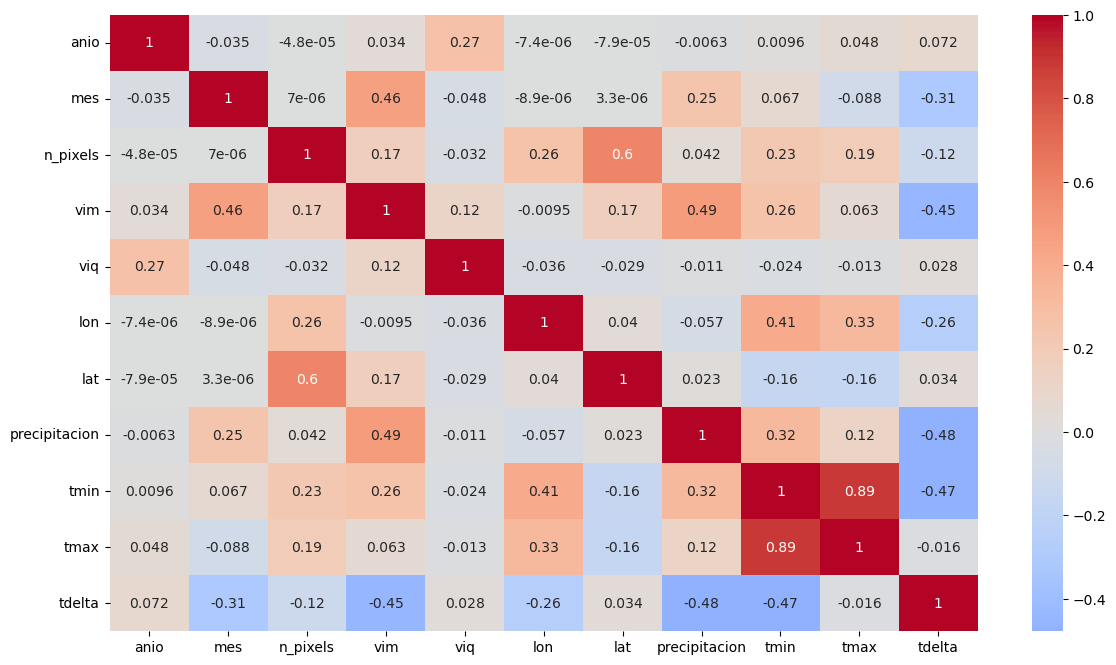

In [9]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, center=0)

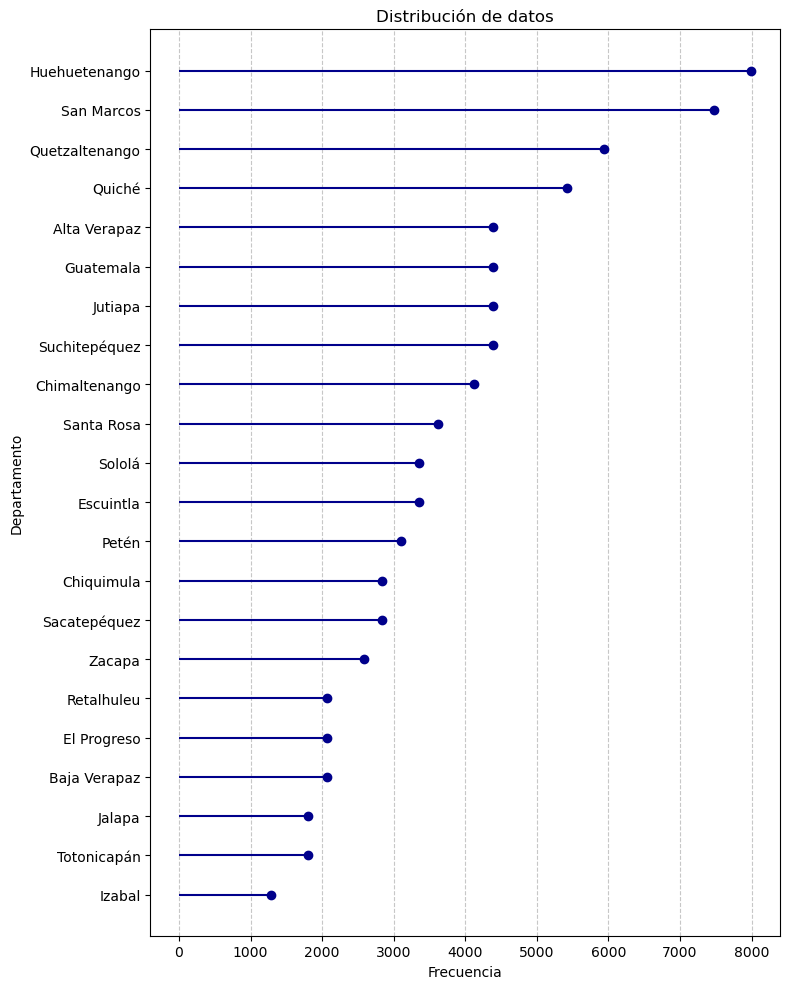

In [18]:
value_counts = df['departamento'].value_counts()

value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['departamento', 'count']

value_counts_df.sort_values('count', ascending=True, inplace=True)

plt.figure(figsize=(8, 10))

plt.hlines(y=value_counts_df['departamento'], xmin=0, xmax=value_counts_df['count'], color='darkblue')

plt.plot(value_counts_df['count'], value_counts_df['departamento'], 'o', color='darkblue')

plt.xlabel('Frecuencia')
plt.ylabel('Departamento')
plt.title('Distribución de datos')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\esco1\AppData\Local\Temp\ipykernel_18832\1982831261.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = filtered_df[filtered_df['anio'].isin([2002, 2012, 2023])].groupby(['departamento', 'anio']).mean().reset_index()


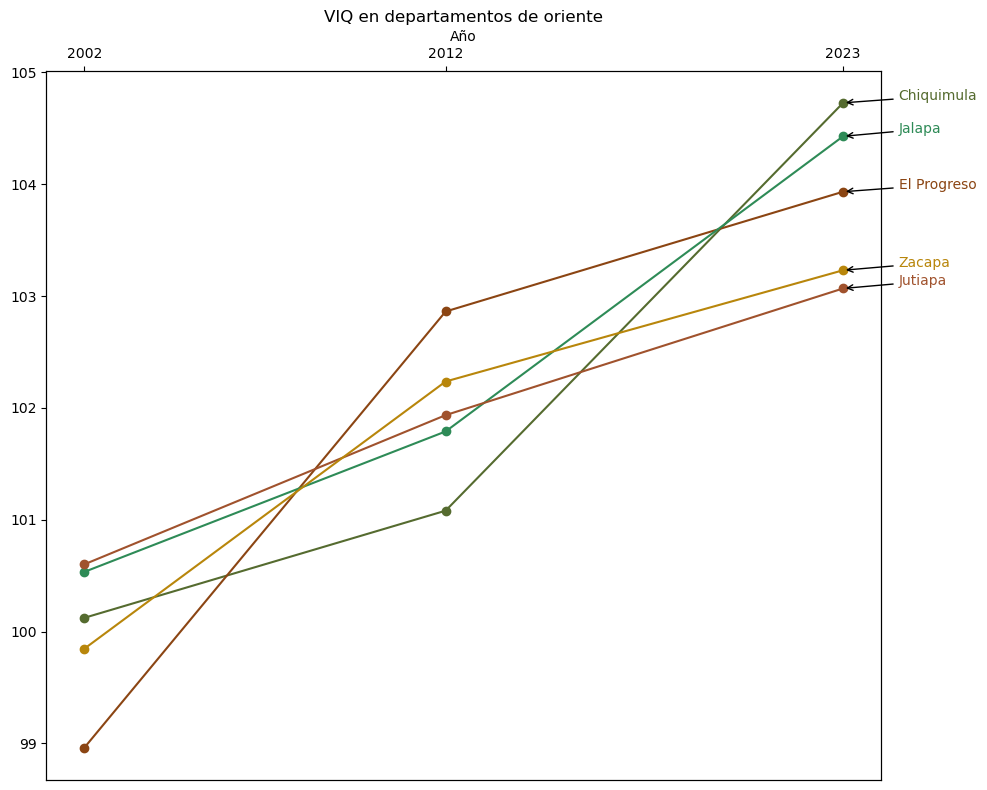

In [44]:
desired_departments = ["El Progreso", "Chiquimula","Jalapa", "Zacapa", "Jutiapa"]
filtered_df = df[df['departamento'].isin(desired_departments)]
df_mean = filtered_df[filtered_df['anio'].isin([2002, 2012, 2023])].groupby(['departamento', 'anio']).mean().reset_index()
df_pivot = df_mean.pivot(index='departamento', columns='anio', values='viq')


num_departments = len(df_pivot.index)
custom_colors = [
    "#556b2f",  # Olive Drab
    "#8b4513",  # Saddle Brown
    "#2e8b57",  # Sea Green
    "#a0522d",  # Sienna
    "#b8860b",  # Dark Golden Rod
    "#6e8b3d",  # Dark Olive Green
    "#800000",  # Maroon
    "#483d8b",  # Dark Slate Blue
]
colors = custom_colors[:len(df_pivot.index)]

fig, ax = plt.subplots(figsize=(10, 8))

for department, color in zip(df_pivot.index, colors):
    years = df_pivot.columns.tolist()
    values = df_pivot.loc[department].values.tolist()
    ax.plot(years, values, marker='o', label=department, color=color)
    ax.annotate(department,
                xy=(years[-1], values[-1]), xycoords='data',
                xytext=(40, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                ha='left', va='bottom', color=color)

ax.get_xaxis().set_visible(False)

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks([2002, 2012, 2023])
ax_top.set_xticklabels(["2002", "2012", "2023"])
ax_top.set_xlabel('Año')

plt.title('VIQ en departamentos de oriente')

plt.tight_layout()
plt.show()


C:\Users\esco1\AppData\Local\Temp\ipykernel_22308\752090824.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = filtered_df[filtered_df['anio'].isin([2002, 2012, 2023])].groupby(['departamento', 'anio']).mean().reset_index()


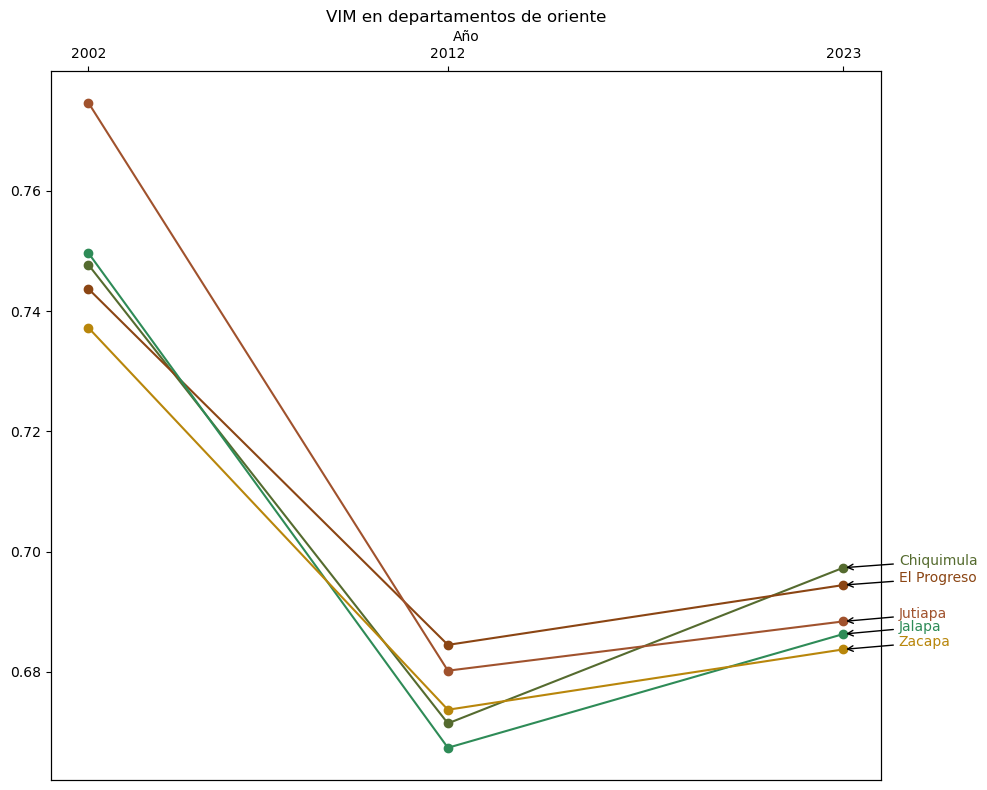

In [10]:
desired_departments = ["El Progreso", "Chiquimula","Jalapa", "Zacapa", "Jutiapa"]
filtered_df = df[df['departamento'].isin(desired_departments)]
df_mean = filtered_df[filtered_df['anio'].isin([2002, 2012, 2023])].groupby(['departamento', 'anio']).mean().reset_index()
df_pivot = df_mean.pivot(index='departamento', columns='anio', values='vim')


num_departments = len(df_pivot.index)
custom_colors = [
    "#556b2f",  # Olive Drab
    "#8b4513",  # Saddle Brown
    "#2e8b57",  # Sea Green
    "#a0522d",  # Sienna
    "#b8860b",  # Dark Golden Rod
    "#6e8b3d",  # Dark Olive Green
    "#800000",  # Maroon
    "#483d8b",  # Dark Slate Blue
]
colors = custom_colors[:len(df_pivot.index)]

fig, ax = plt.subplots(figsize=(10, 8))

for department, color in zip(df_pivot.index, colors):
    years = df_pivot.columns.tolist()
    values = df_pivot.loc[department].values.tolist()
    ax.plot(years, values, marker='o', label=department, color=color)
    ax.annotate(department,
                xy=(years[-1], values[-1]), xycoords='data',
                xytext=(40, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                ha='left', va='bottom', color=color)

ax.get_xaxis().set_visible(False)

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks([2002, 2012, 2023])
ax_top.set_xticklabels(["2002", "2012", "2023"])
ax_top.set_xlabel('Año')

plt.title('VIM en departamentos de oriente')

plt.tight_layout()
plt.show()


C:\Users\esco1\AppData\Local\Temp\ipykernel_22308\325933069.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = filtered_df[filtered_df['anio'].isin([2002, 2012, 2023])].groupby(['departamento', 'anio']).mean().reset_index()


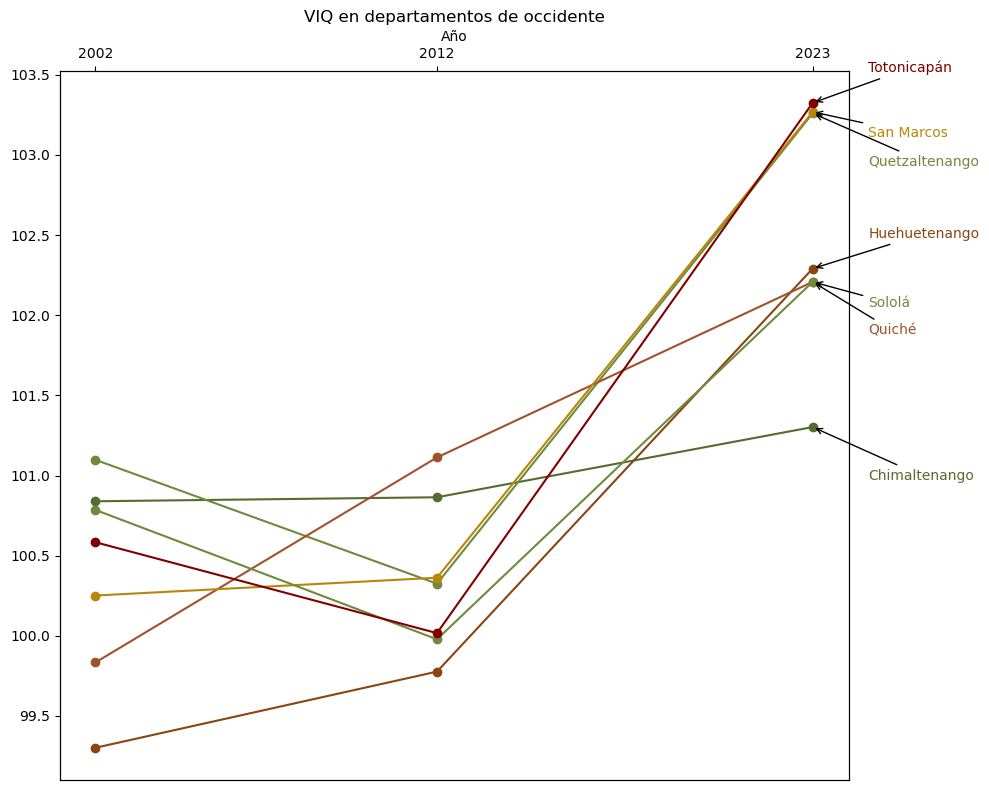

In [35]:
desired_departments2 = ["Huehuetenango", "San Marcos", "Quiché", "Quetzaltenango", "Totonicapán", "Chimaltenango","Sololá"]
filtered_df = df[df['departamento'].isin(desired_departments2)]
df_mean = filtered_df[filtered_df['anio'].isin([2002, 2012, 2023])].groupby(['departamento', 'anio']).mean().reset_index()
df_pivot = df_mean.pivot(index='departamento', columns='anio', values='viq')


num_departments = len(df_pivot.index)
custom_colors = [
    "#556b2f",  # Olive Drab
    "#8b4513",  # Saddle Brown
    "#6e8b3d",  # Sea Green
    "#a0522d",  # Sienna
    "#b8860b",  # Dark Golden Rod
    "#6e8b3d",  # Dark Olive Green
    "#800000",  # Maroon
    "#483d8b",  # Dark Slate Blue
]
colors = custom_colors[:len(df_pivot.index)]

fig, ax = plt.subplots(figsize=(10, 8))

for department, color in zip(df_pivot.index, colors):
    years = df_pivot.columns.tolist()
    values = df_pivot.loc[department].values.tolist()
    ax.plot(years, values, marker='o', label=department, color=color)
    xytext = (40,-40)
    if department== "Huehuetenango" or department=="Totonicapán":
        xytext = (40, 20)  # Move text down
    elif department=="Sololá" or department=="San Marcos":
        xytext = (40,-20)
    else:
        xytext = (40, -40)  # Default position
    ax.annotate(department,
                xy=(years[-1], values[-1]), xycoords='data',
                xytext=xytext, textcoords='offset points',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                ha='left', va='bottom', color=color)

ax.get_xaxis().set_visible(False)

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks([2002, 2012, 2023])
ax_top.set_xticklabels(["2002", "2012", "2023"])
ax_top.set_xlabel('Año')

plt.title('VIQ en departamentos de occidente')

plt.tight_layout()
plt.show()


C:\Users\esco1\AppData\Local\Temp\ipykernel_22308\2862694380.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = filtered_df[filtered_df['anio'].isin([2002, 2012, 2023])].groupby(['departamento', 'anio']).mean().reset_index()


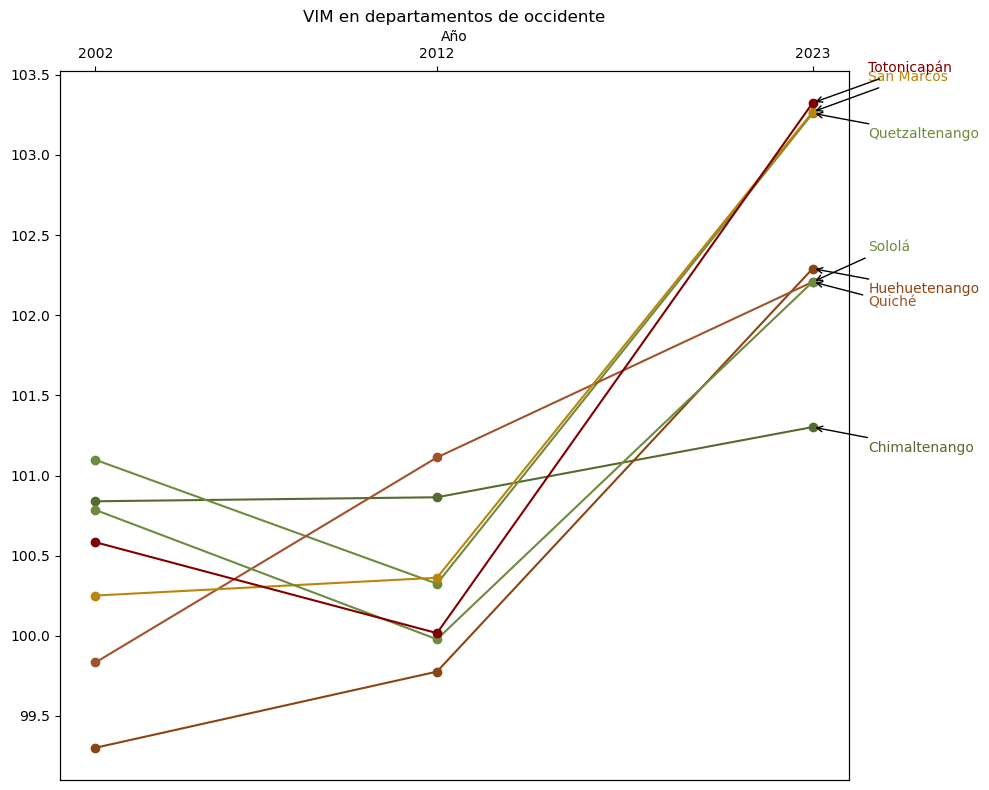

In [24]:
desired_departments2 = ["Huehuetenango", "San Marcos", "Quiché", "Quetzaltenango", "Totonicapán", "Chimaltenango","Sololá"]
filtered_df = df[df['departamento'].isin(desired_departments2)]
df_mean = filtered_df[filtered_df['anio'].isin([2002, 2012, 2023])].groupby(['departamento', 'anio']).mean().reset_index()
df_pivot = df_mean.pivot(index='departamento', columns='anio', values='viq')


num_departments = len(df_pivot.index)
custom_colors = [
    "#556b2f",  # Olive Drab
    "#8b4513",  # Saddle Brown
    "#6e8b3d",  # Sea Green
    "#a0522d",  # Sienna
    "#b8860b",  # Dark Golden Rod
    "#6e8b3d",  # Dark Olive Green
    "#800000",  # Maroon
    "#483d8b",  # Dark Slate Blue
]
colors = custom_colors[:len(df_pivot.index)]

fig, ax = plt.subplots(figsize=(10, 8))

for department, color in zip(df_pivot.index, colors):
    years = df_pivot.columns.tolist()
    values = df_pivot.loc[department].values.tolist()
    ax.plot(years, values, marker='o', label=department, color=color)
    xytext = (40, -40)

    if department== "Sololá" or department=="Totonicapán" or department=="San Marcos":
        xytext = (40, 20)  # Move text down
    else:
        xytext = (40, -20)  # Default position
    ax.annotate(department,
                xy=(years[-1], values[-1]), xycoords='data',
                xytext=xytext, textcoords='offset points',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                ha='left', va='bottom', color=color)

ax.get_xaxis().set_visible(False)

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks([2002, 2012, 2023])
ax_top.set_xticklabels(["2002", "2012", "2023"])
ax_top.set_xlabel('Año')

plt.title('VIM en departamentos de occidente')

plt.tight_layout()
plt.show()


<Axes: xlabel='vim', ylabel='departamento'>

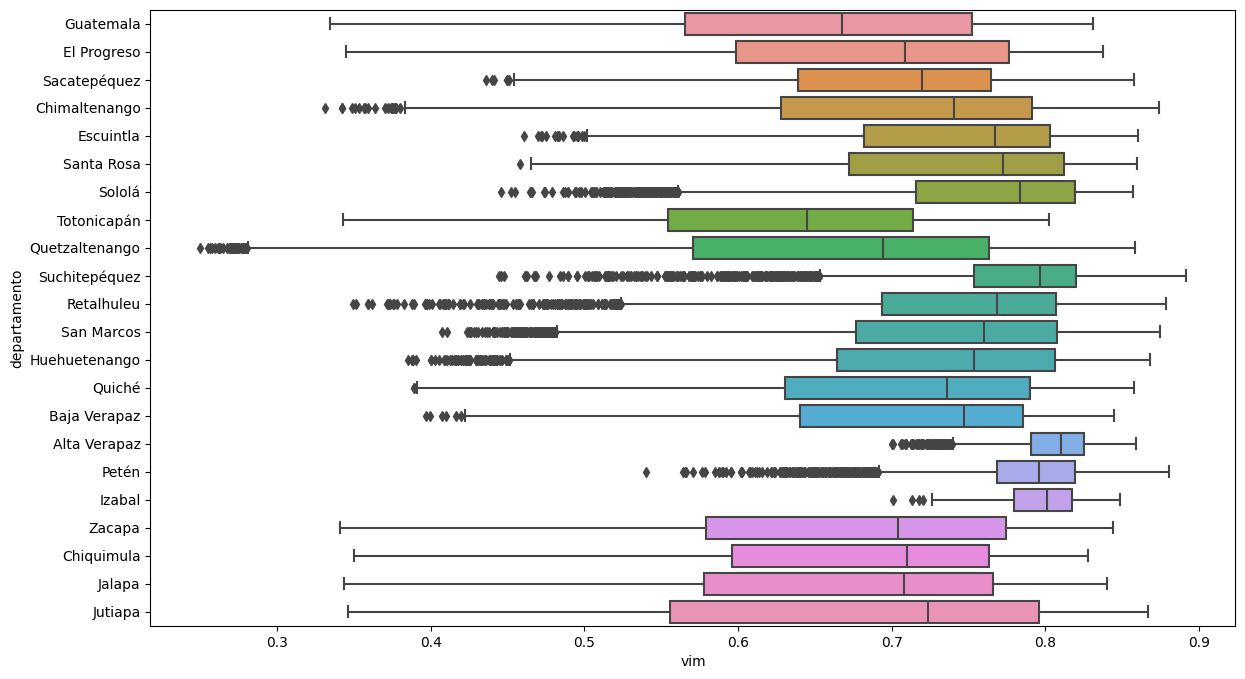

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(df, x="vim", y="departamento")

<Axes: xlabel='vim', ylabel='mes'>

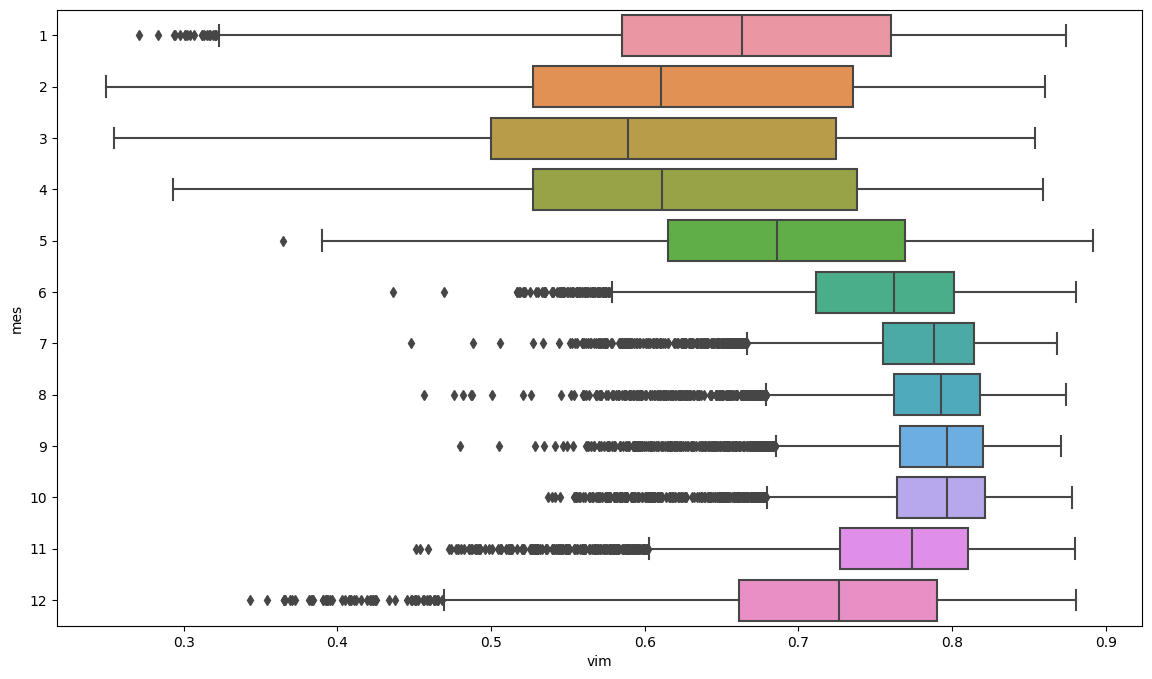

In [29]:
plt.figure(figsize=(14, 8))
sns.boxplot(df, x="vim", y="mes", orient="h")

<Axes: xlabel='vim', ylabel='anio'>

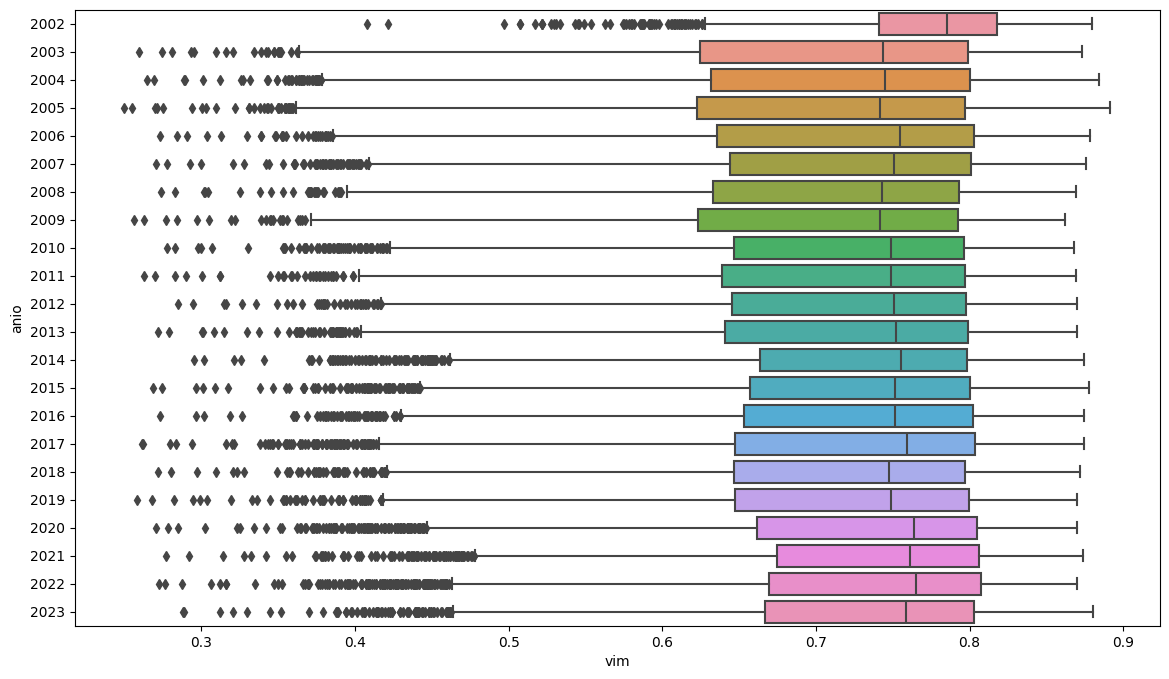

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(df, x="vim", y="anio", orient="h")

<Axes: xlabel='vim', ylabel='Count'>

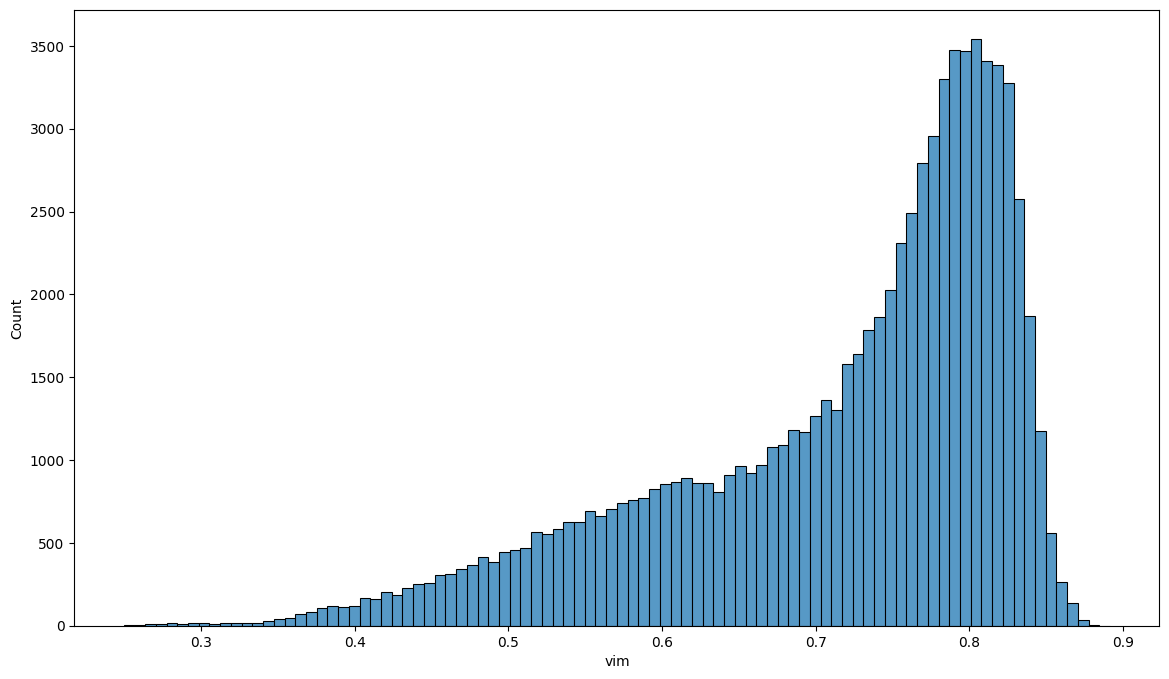

In [31]:
plt.figure(figsize=(14, 8))
sns.histplot(df, x="vim")

<Axes: xlabel='viq', ylabel='Count'>

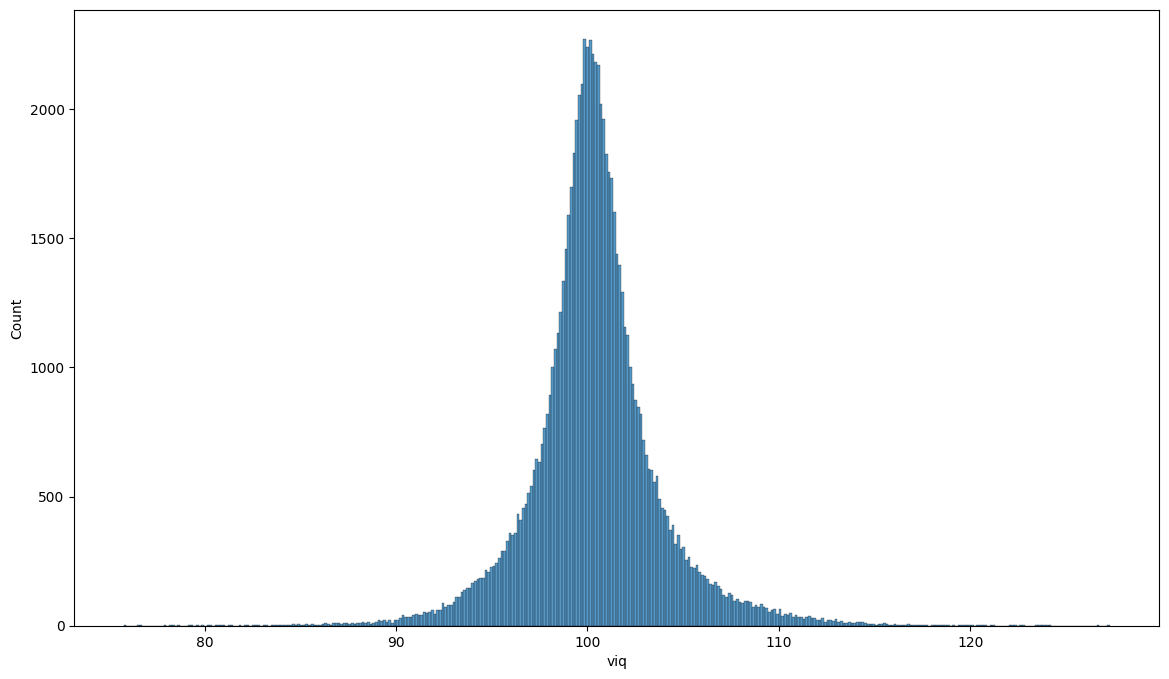

In [32]:
plt.figure(figsize=(14, 8))
sns.histplot(df, x="viq")

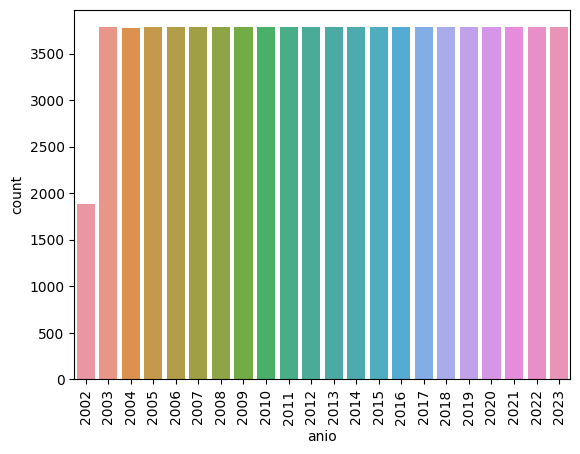

In [33]:
sns.countplot(df, x="anio")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='precipitacion', ylabel='vim'>

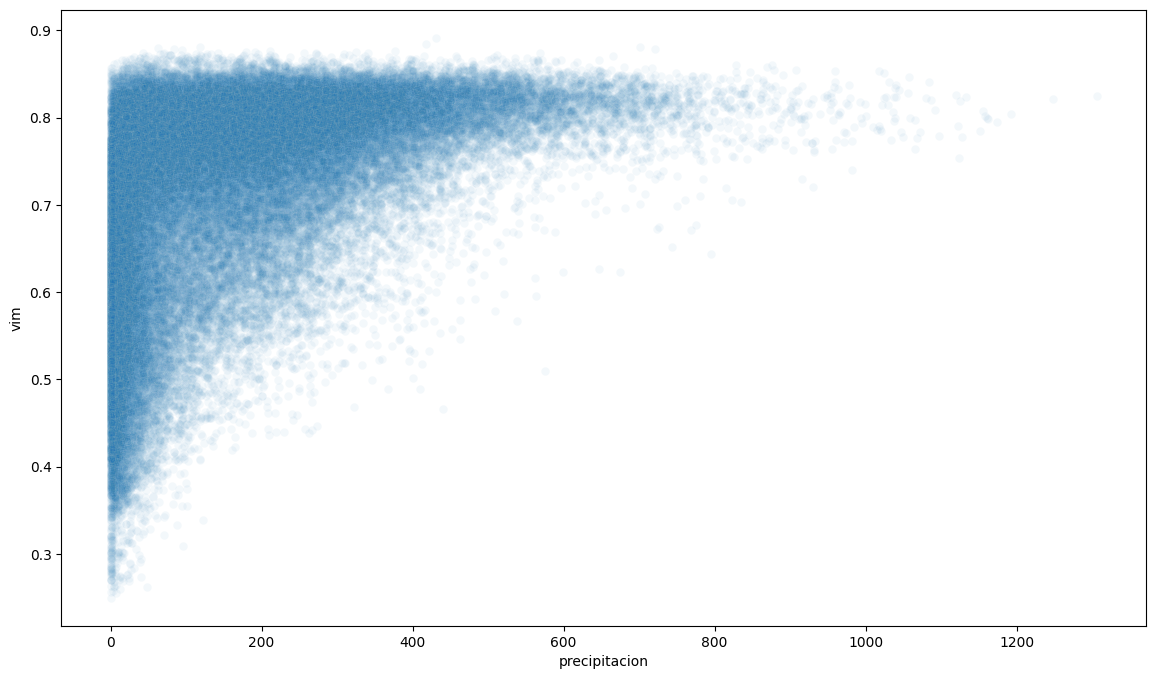

In [34]:
plt.figure(figsize=(14, 8))
sns.scatterplot(df, x="precipitacion", y="vim", alpha=0.05)

<Axes: xlabel='tdelta', ylabel='vim'>

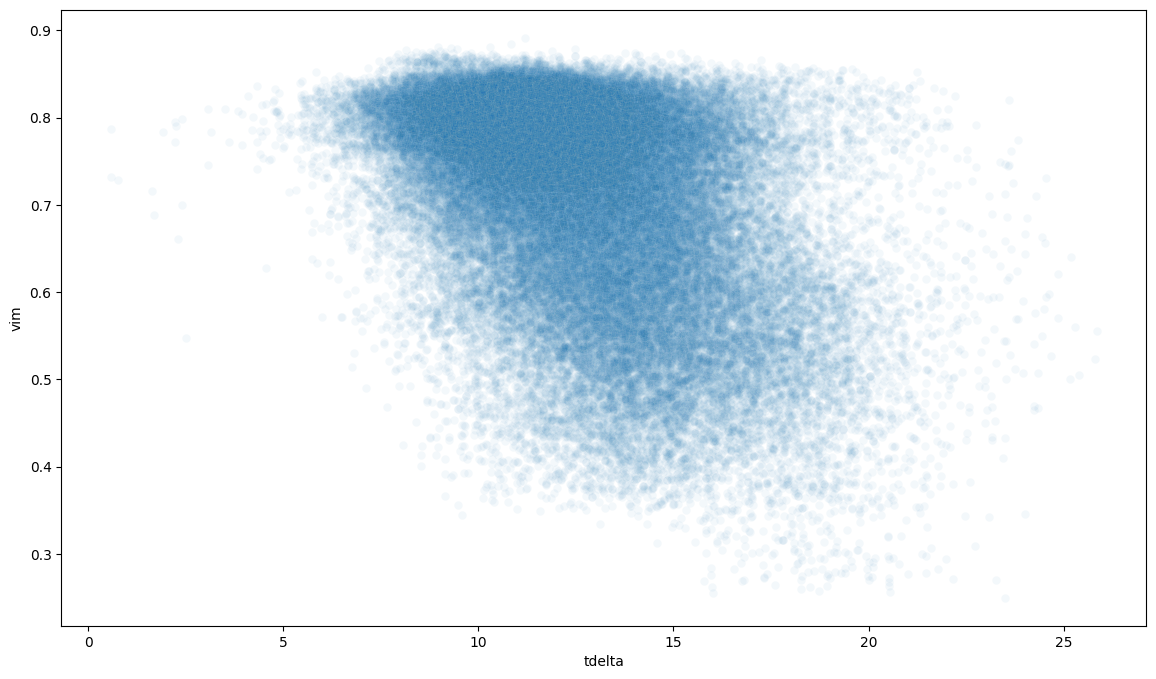

In [35]:
plt.figure(figsize=(14, 8))
sns.scatterplot(df, x="tdelta", y="vim", alpha=0.05)

<Axes: xlabel='viq', ylabel='mes'>

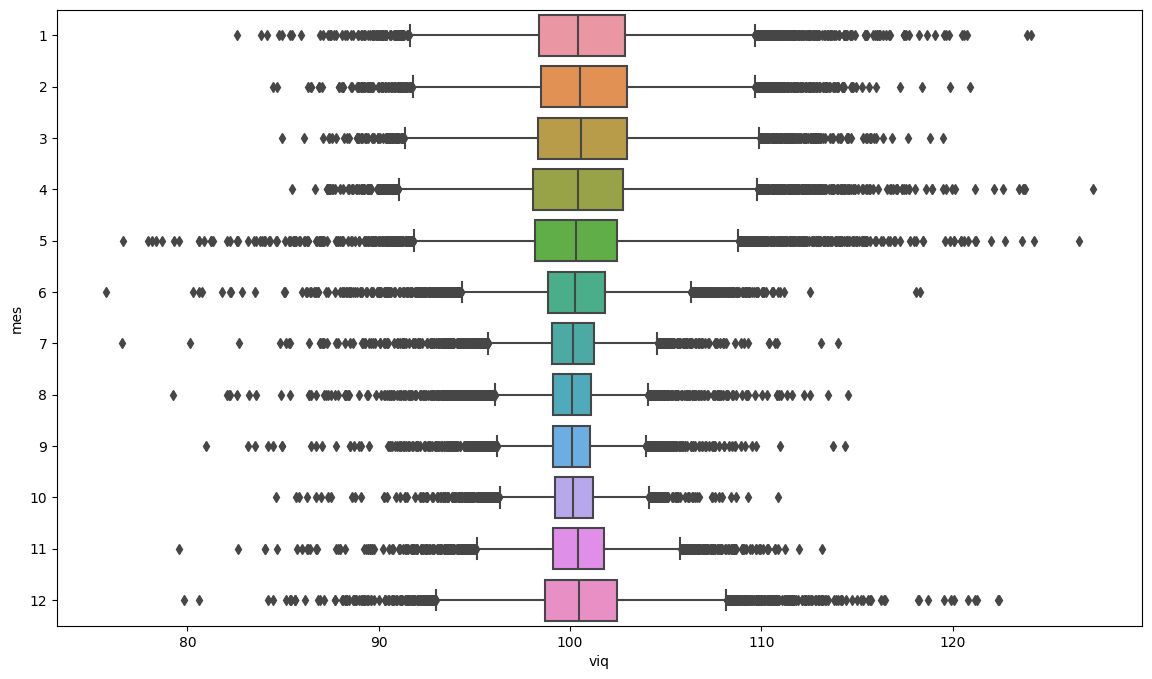

In [36]:
plt.figure(figsize=(14, 8))
sns.boxplot(df, x="viq", y="mes", orient="h")

<Axes: xlabel='viq', ylabel='anio'>

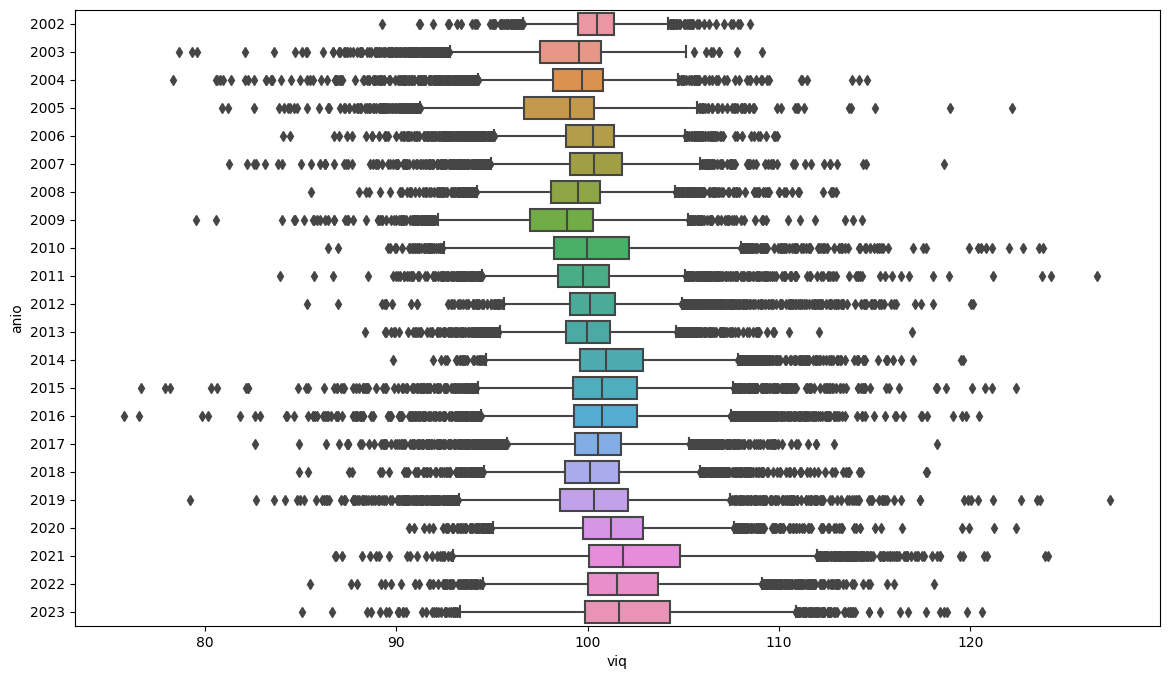

In [37]:
plt.figure(figsize=(14, 8))
sns.boxplot(df, x="viq", y="anio", orient="h")

In [38]:
promedio_municipio = df.groupby(by="ADM2_PCODE").mean().reset_index()
promedio_municipio

C:\Users\jpcor\AppData\Local\Temp\ipykernel_10584\3357884568.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  promedio_municipio = df.groupby(by="ADM2_PCODE").mean().reset_index()


,ADM2_PCODE,anio,mes,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,tdelta
0,GT0100,2012.744186,6.569767,1.0,0.586015,99.668550,-90.548878,14.435029,157.162746,15.426287,25.375911,9.949624
1,GT0101,2012.744186,6.569767,6.0,0.495854,99.793935,-90.479418,14.635431,121.781601,15.012501,25.169098,10.156597
2,GT0102,2012.744186,6.569767,2.0,0.649732,100.375662,-90.465079,14.564392,124.007071,13.765099,23.951313,10.186214
3,GT0103,2012.744186,6.569767,5.0,0.750555,100.423461,-90.346363,14.554316,136.112721,11.154456,20.703482,9.549027
4,GT0104,2012.744186,6.569767,2.0,0.654073,100.158222,-90.372463,14.793193,106.216238,18.468180,28.671301,10.203121
...,...,...,...,...,...,...,...,...,...,...,...,...
310,GT2213,2012.744186,6.569767,4.0,0.667733,100.812055,-90.016291,14.009939,157.589045,17.817059,30.185094,12.368035
311,GT2214,2012.744186,6.569767,14.0,0.718227,100.452142,-90.125606,13.910458,154.263543,21.850330,33.321702,11.471372
312,GT2215,2012.744186,6.569767,5.0,0.701824,100.689083,-90.263685,13.967475,147.997031,22.523901,34.309518,11.785617
313,GT2216,2012.744186,6.569767,4.0,0.773713,100.813873,-90.145611,14.272053,124.130605,15.116868,27.498939,12.382070


In [39]:
promedio_departamento = df.groupby(by="departamento").mean().reset_index()
promedio_departamento.head()

C:\Users\jpcor\AppData\Local\Temp\ipykernel_10584\3646937710.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  promedio_departamento = df.groupby(by="departamento").mean().reset_index()


,departamento,anio,mes,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,tdelta
0,Alta Verapaz,2012.744186,6.569767,21.000000,0.806044,99.904567,-90.089375,15.520189,204.483477,16.722834,28.796734,12.073900
1,Baja Verapaz,2012.744186,6.569767,12.625000,0.710832,100.232951,-90.389604,15.093024,112.909276,14.176044,28.116132,13.940088
2,Chimaltenango,2012.749394,6.569074,3.938682,0.707959,100.077020,-90.921939,14.672445,120.848403,10.766339,23.290105,12.523766
3,Chiquimula,2012.744186,6.569767,7.090909,0.673504,100.863985,-89.442140,14.686655,131.438990,18.079662,29.399669,11.320007
4,El Progreso,2012.744186,6.569767,7.875000,0.672501,100.254662,-90.081571,14.883000,102.751767,17.841414,29.417683,11.576269


In [40]:
import geopandas

In [41]:
gt = geopandas.read_file("dataset/gtm_adm_ocha_conred_2019_SHP/gtm_admbnda_adm1_ocha_conred_20190207.shp")
gt = gt[["ADM1_ES", "geometry"]]
gt.rename(columns={"ADM1_ES": "departamento"}, inplace=True)
promedio_departamento = gt.merge(promedio_departamento, "outer", on="departamento")
promedio_departamento.head()

,departamento,geometry,anio,mes,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,tdelta
0,Alta Verapaz,"POLYGON ((-90.40980 16.06946, -90.39227 16.067...",2012.744186,6.569767,21.000000,0.806044,99.904567,-90.089375,15.520189,204.483477,16.722834,28.796734,12.073900
1,Baja Verapaz,"POLYGON ((-90.63282 15.29192, -90.63240 15.278...",2012.744186,6.569767,12.625000,0.710832,100.232951,-90.389604,15.093024,112.909276,14.176044,28.116132,13.940088
2,Chimaltenango,"POLYGON ((-90.99903 14.93806, -90.99836 14.937...",2012.749394,6.569074,3.938682,0.707959,100.077020,-90.921939,14.672445,120.848403,10.766339,23.290105,12.523766
3,Chiquimula,"POLYGON ((-89.19070 14.90096, -89.19645 14.899...",2012.744186,6.569767,7.090909,0.673504,100.863985,-89.442140,14.686655,131.438990,18.079662,29.399669,11.320007
4,El Progreso,"POLYGON ((-89.93963 15.14023, -89.93376 15.139...",2012.744186,6.569767,7.875000,0.672501,100.254662,-90.081571,14.883000,102.751767,17.841414,29.417683,11.576269


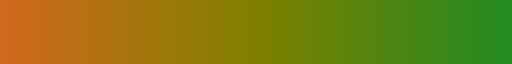

In [42]:
VEG_CMAP = sns.color_palette("blend:chocolate,olive,forestgreen", as_cmap=True)
VEG_CMAP

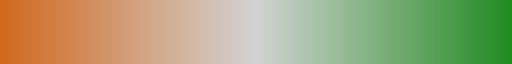

In [43]:
VEG_CMAP_0 = sns.color_palette("blend:chocolate,lightgray,forestgreen", as_cmap=True)
VEG_CMAP_0

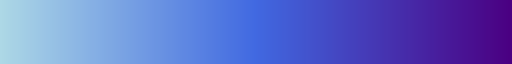

In [44]:
LLUVIA_CMAP = sns.color_palette("blend:lightblue,royalblue,indigo", as_cmap=True)
LLUVIA_CMAP

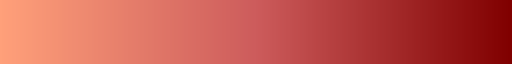

In [45]:
TEMP_CMAP = sns.color_palette("blend:lightsalmon,indianred,maroon", as_cmap=True)
TEMP_CMAP

(-92.44117971794999,
 -88.02056028504994,
 13.535442914050071,
 18.023453868950064)

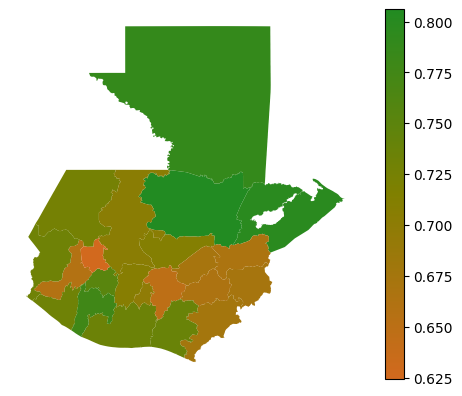

In [46]:
promedio_departamento.plot(column="vim", cmap=VEG_CMAP, legend=True)
plt.axis("off")

(-92.44117971794999,
 -88.02056028504994,
 13.535442914050071,
 18.023453868950064)

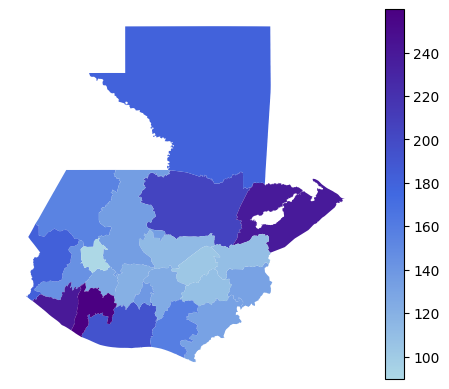

In [47]:
promedio_departamento.plot(column="precipitacion", cmap=LLUVIA_CMAP, legend=True)
plt.axis("off")

(-92.44117971794999,
 -88.02056028504994,
 13.535442914050071,
 18.023453868950064)

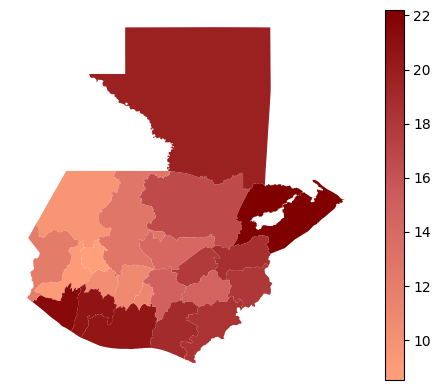

In [48]:
promedio_departamento.plot(column="tmin", cmap=TEMP_CMAP, legend=True)
plt.axis("off")

(-92.44117971794999,
 -88.02056028504994,
 13.535442914050071,
 18.023453868950064)

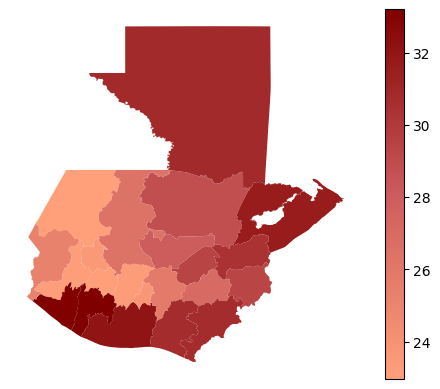

In [49]:
promedio_departamento.plot(column="tmax", cmap=TEMP_CMAP, legend=True)
plt.axis("off")

(-92.44117971794999,
 -88.02056028504994,
 13.535442914050071,
 18.023453868950064)

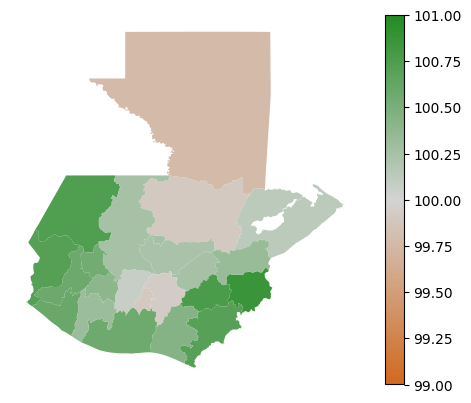

In [50]:
promedio_departamento.plot(column="viq", cmap=VEG_CMAP_0, legend=True, vmin=99, vmax=101)
plt.axis("off")

(-92.44117971794999,
 -88.02056028504994,
 13.535442914050071,
 18.023453868950064)

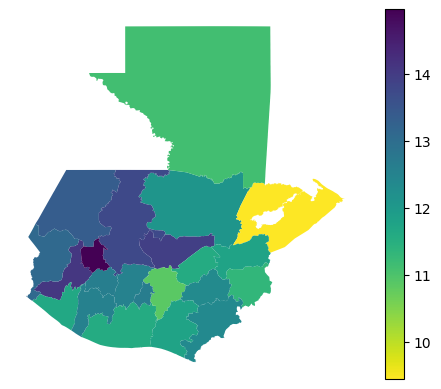

In [51]:
promedio_departamento.plot(column="tdelta", cmap="viridis_r", legend=True)
plt.axis("off")

In [52]:
gt = geopandas.read_file("dataset/gtm_adm_ocha_conred_2019_SHP/gtm_admbnda_adm2_ocha_conred_20190207.shp")
gt = gt[["ADM2_PCODE", "geometry"]]
promedio_municipio = gt.merge(promedio_municipio, "outer", on="ADM2_PCODE")
promedio_municipio.head()

,ADM2_PCODE,geometry,anio,mes,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,tdelta
0,GT0411,"POLYGON ((-90.96027 14.59634, -90.95620 14.594...",2012.744186,6.569767,6.0,0.794955,100.195809,-90.956307,14.547826,159.180754,16.152460,27.228780,11.076320
1,GT2204,"POLYGON ((-89.54702 14.51849, -89.54562 14.518...",2012.744186,6.569767,11.0,0.635909,100.602196,-89.599949,14.458206,134.745302,18.912765,30.405738,11.492973
2,GT1327,"POLYGON ((-91.17128 15.38646, -91.16989 15.384...",2012.744186,6.569767,11.0,0.661134,100.792937,-91.213843,15.333277,117.667557,14.624251,29.056242,14.431991
3,GT0913,"POLYGON ((-91.46098 14.82363, -91.46459 14.820...",2012.744186,6.569767,1.0,0.540993,100.049373,-91.484486,14.811737,96.481463,7.002846,21.928545,14.925700
4,GT0314,"POLYGON ((-90.81634 14.49698, -90.81160 14.495...",2012.744186,6.569767,4.0,0.752809,100.090459,-90.819675,14.459525,238.633461,14.098645,25.388927,11.290282


(-92.41021900109996,
 -88.02203460489994,
 13.535442914050071,
 18.023453868950064)

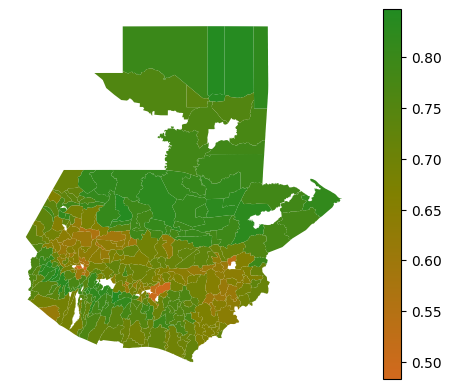

In [53]:
promedio_municipio.plot(column="vim", legend=True, cmap=VEG_CMAP)
plt.axis("off")

(-92.41021900109996,
 -88.02203460489994,
 13.535442914050071,
 18.023453868950064)

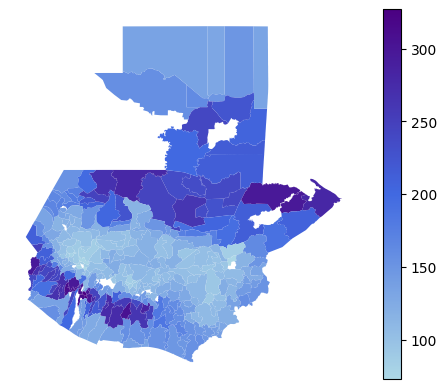

In [54]:
promedio_municipio.plot(column="precipitacion", legend=True, cmap=LLUVIA_CMAP)
plt.axis("off")

(-92.41021900109996,
 -88.02203460489994,
 13.535442914050071,
 18.023453868950064)

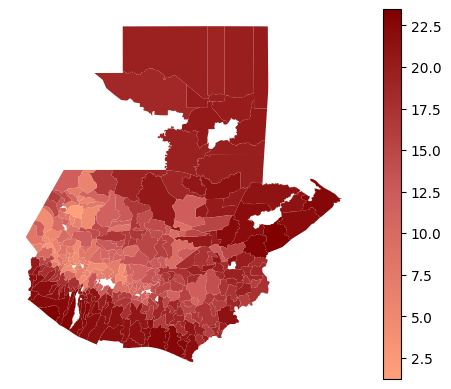

In [55]:
promedio_municipio.plot(column="tmin", legend=True, cmap=TEMP_CMAP)
plt.axis("off")

(-92.41021900109996,
 -88.02203460489994,
 13.535442914050071,
 18.023453868950064)

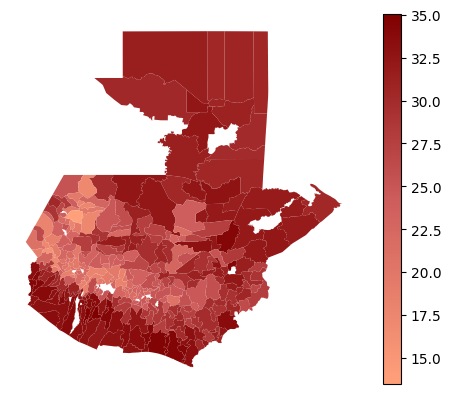

In [56]:
promedio_municipio.plot(column="tmax", legend=True, cmap=TEMP_CMAP)
plt.axis("off")

(-92.41021900109996,
 -88.02203460489994,
 13.535442914050071,
 18.023453868950064)

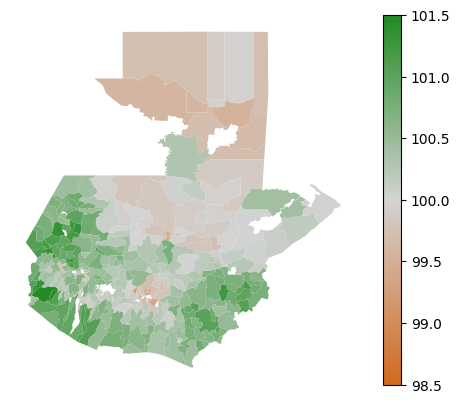

In [57]:
promedio_municipio.plot(column="viq", legend=True, cmap=VEG_CMAP_0, vmin=98.5, vmax=101.5)
plt.axis("off")

(-92.41021900109996,
 -88.02203460489994,
 13.535442914050071,
 18.023453868950064)

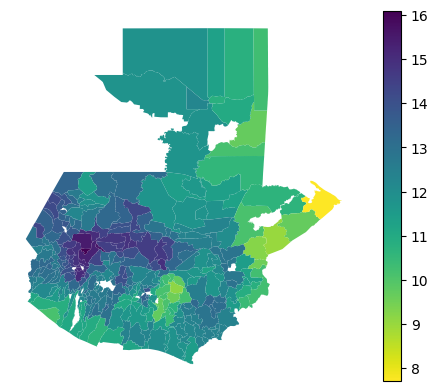

In [58]:
promedio_municipio.plot(column="tdelta", legend=True, cmap="viridis_r")
plt.axis("off")

In [59]:
primer_anio = df[df.anio == 2003]
ultimo_anio = df[df.anio == 2023]

primer_anio = primer_anio.groupby("ADM2_PCODE").mean().reset_index()
ultimo_anio = ultimo_anio.groupby("ADM2_PCODE").mean().reset_index()


C:\Users\jpcor\AppData\Local\Temp\ipykernel_10584\3166147117.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  primer_anio = primer_anio.groupby("ADM2_PCODE").mean().reset_index()
C:\Users\jpcor\AppData\Local\Temp\ipykernel_10584\3166147117.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ultimo_anio = ultimo_anio.groupby("ADM2_PCODE").mean().reset_index()


In [60]:
primer_anio = df[df.anio == 2003]
ultimo_anio = df[df.anio == 2023]

primer_anio = primer_anio.groupby("ADM2_PCODE").mean().reset_index()
ultimo_anio = ultimo_anio.groupby("ADM2_PCODE").mean().reset_index()

primer_anio = gt.merge(primer_anio, "outer", on="ADM2_PCODE")
ultimo_anio = gt.merge(ultimo_anio, "outer", on="ADM2_PCODE")

primer_anio["vim2003"] = primer_anio["vim"]
ultimo_anio["vim2023"] = ultimo_anio["vim"]

primer_ultimo = primer_anio.merge(ultimo_anio[["ADM2_PCODE", "vim2023"]], "inner", on="ADM2_PCODE")
primer_ultimo["diferencia"] = primer_ultimo.vim2023 - primer_ultimo.vim2003
primer_ultimo.head()


C:\Users\jpcor\AppData\Local\Temp\ipykernel_10584\1755467739.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  primer_anio = primer_anio.groupby("ADM2_PCODE").mean().reset_index()
C:\Users\jpcor\AppData\Local\Temp\ipykernel_10584\1755467739.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ultimo_anio = ultimo_anio.groupby("ADM2_PCODE").mean().reset_index()


,ADM2_PCODE,geometry,anio,mes,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,tdelta,vim2003,vim2023,diferencia
0,GT0411,"POLYGON ((-90.96027 14.59634, -90.95620 14.594...",2003.0,6.5,6.0,0.795783,100.369192,-90.956307,14.547826,149.629705,11.388994,26.759670,15.370676,0.795783,0.801547,0.005764
1,GT2204,"POLYGON ((-89.54702 14.51849, -89.54562 14.518...",2003.0,6.5,11.0,0.639228,101.237178,-89.599949,14.458206,141.835426,18.119215,29.717991,11.598776,0.639228,0.650444,0.011217
2,GT1327,"POLYGON ((-91.17128 15.38646, -91.16989 15.384...",2003.0,6.5,11.0,0.636092,97.280111,-91.213843,15.333277,108.965265,13.342367,29.304803,15.962436,0.636092,0.683911,0.047819
3,GT0913,"POLYGON ((-91.46098 14.82363, -91.46459 14.820...",2003.0,6.5,1.0,0.522328,96.386239,-91.484486,14.811737,86.014365,7.049778,21.837597,14.787818,0.522328,0.561522,0.039194
4,GT0314,"POLYGON ((-90.81634 14.49698, -90.81160 14.495...",2003.0,6.5,4.0,0.752300,100.077611,-90.819675,14.459525,232.122204,13.086900,25.626809,12.539908,0.752300,0.758542,0.006242


Text(0.5, 1.0, 'Diferencia VIM 2023-2003')

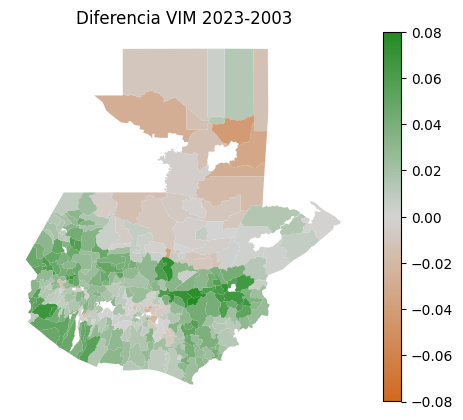

In [61]:
primer_ultimo.plot(column="diferencia", legend=True, cmap=VEG_CMAP_0, vmin=-0.08, vmax=0.08)
plt.axis("off")
plt.title("Diferencia VIM 2023-2003")

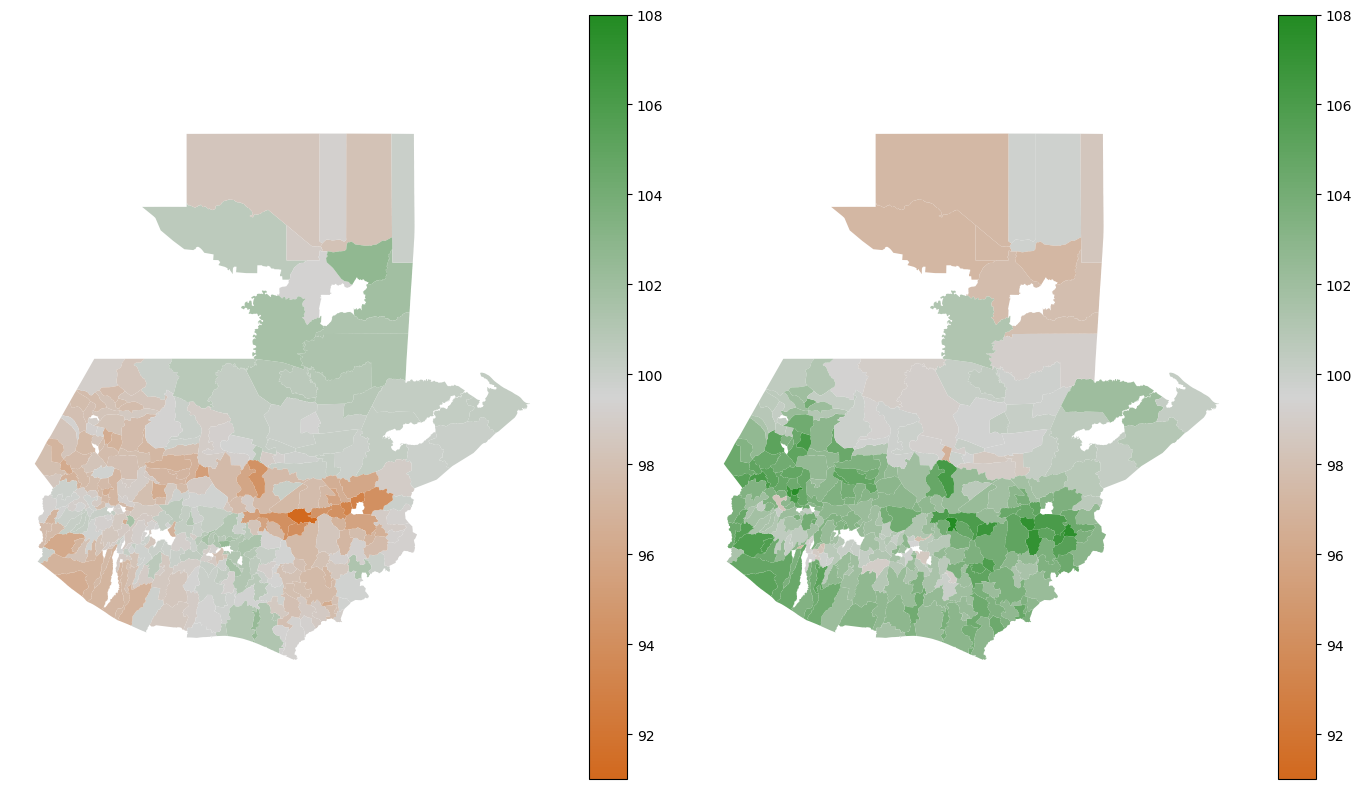

In [62]:
fig, axes = plt.subplots(figsize=(14, 8), ncols=2, sharex="all", sharey="all")
ax1, ax2 = axes
primer_anio.plot(ax=ax1, column="viq", vmin=91, vmax=108, cmap=VEG_CMAP_0, legend=True)
ax1.axis("off")
im = ultimo_anio.plot(ax=ax2, column="viq", vmin=91, vmax=108, legend=True, cmap=VEG_CMAP_0)
ax2.axis("off")
plt.tight_layout()

In [63]:
from sklearn.cluster import KMeans

df.head()

,anio,mes,ADM2_PCODE,departamento,municipio,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,date,tdelta
0,2002,7,GT0100,Guatemala,Lago De Amatitlan,1.0,0.686067,100.902100,-90.548878,14.435029,169.31514,16.139826,25.118555,2002-07-11,8.978729
1,2002,7,GT0101,Guatemala,Guatemala,6.0,0.586433,101.562333,-90.479418,14.635431,191.59773,15.752864,25.048338,2002-07-11,9.295474
2,2002,7,GT0102,Guatemala,Santa Catarina Pinula,2.0,0.707967,101.330167,-90.465079,14.564392,186.14903,14.537229,23.773886,2002-07-11,9.236657
3,2002,7,GT0103,Guatemala,San José Pinula,5.0,0.796333,100.334500,-90.346363,14.554316,199.11770,11.996284,20.399480,2002-07-11,8.403196
4,2002,7,GT0104,Guatemala,San José del Golfo,2.0,0.774200,98.992867,-90.372463,14.793193,135.58841,19.454800,28.777624,2002-07-11,9.322824


In [72]:
df_cluster = df.drop(['anio',"mes","ADM2_PCODE","departamento","municipio","n_pixels","date"], axis=1 )

df_cluster

,vim,viq,lon,lat,precipitacion,tmin,tmax,tdelta
0,0.686067,100.902100,-90.548878,14.435029,169.315140,16.139826,25.118555,8.978729
1,0.586433,101.562333,-90.479418,14.635431,191.597730,15.752864,25.048338,9.295474
2,0.707967,101.330167,-90.465079,14.564392,186.149030,14.537229,23.773886,9.236657
3,0.796333,100.334500,-90.346363,14.554316,199.117700,11.996284,20.399480,8.403196
4,0.774200,98.992867,-90.372463,14.793193,135.588410,19.454800,28.777624,9.322824
...,...,...,...,...,...,...,...,...
81259,0.704100,107.931800,-90.016291,14.009939,5.123662,17.152030,31.381617,14.229587
81260,0.746267,105.915933,-90.125606,13.910458,5.091132,21.626705,34.692627,13.065922
81261,0.745167,107.472900,-90.263685,13.967475,2.650791,20.966810,35.301907,14.335097
81262,0.809933,103.087167,-90.145611,14.272053,0.993675,13.331402,27.071432,13.740030


In [76]:
df_norm = (df_cluster - df_cluster.min())/(df_cluster.max()-df_cluster.min())
df_norm

,vim,viq,lon,lat,precipitacion,tmin,tmax,tdelta
0,0.679925,0.487682,0.432856,0.146569,0.129600,0.536784,0.499747,0.332500
1,0.524717,0.500492,0.451995,0.202562,0.146656,0.527047,0.497437,0.345029
2,0.714041,0.495987,0.455946,0.182714,0.142485,0.496458,0.455504,0.342703
3,0.851698,0.476669,0.488657,0.179898,0.152412,0.432520,0.344479,0.309734
4,0.817219,0.450638,0.481466,0.246642,0.103784,0.620198,0.620138,0.346111
...,...,...,...,...,...,...,...,...
81259,0.708017,0.624075,0.579607,0.027796,0.003922,0.562254,0.705815,0.540207
81260,0.773704,0.584962,0.549486,0.000000,0.003897,0.674850,0.814755,0.494176
81261,0.771991,0.615171,0.511439,0.015931,0.002029,0.658245,0.834802,0.544380
81262,0.872884,0.530077,0.543974,0.101032,0.000761,0.466115,0.564001,0.520841


In [91]:
wscc = [] #Within cluster sum of squares 

for i in range(1,14):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_norm) #Aplicamos KMeans a los datos
    wscc.append(kmeans.inertia_)

c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\clust

Text(0, 0.5, 'WSCC')

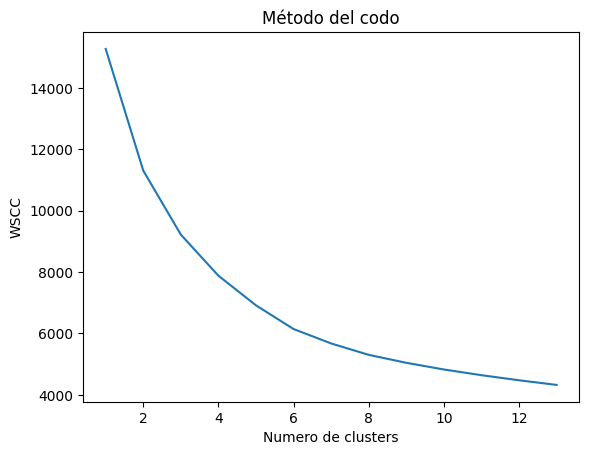

In [92]:
plt.plot(range(1,14), wscc)
plt.title("Método del codo")
plt.xlabel("Numero de clusters")
plt.ylabel("WSCC")

In [94]:
clustering = KMeans(n_clusters = 6, max_iter = 300) #Creamos el modelo
clustering.fit(df_norm) #Aplica el modelo a los datos

c:\Users\jpcor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [97]:
df["cluster"] = clustering.labels_


df

,anio,mes,ADM2_PCODE,departamento,municipio,n_pixels,vim,viq,lon,lat,precipitacion,tmin,tmax,date,tdelta,cluster
0,2002,7,GT0100,Guatemala,Lago De Amatitlan,1.0,0.686067,100.902100,-90.548878,14.435029,169.315140,16.139826,25.118555,2002-07-11,8.978729,4
1,2002,7,GT0101,Guatemala,Guatemala,6.0,0.586433,101.562333,-90.479418,14.635431,191.597730,15.752864,25.048338,2002-07-11,9.295474,0
2,2002,7,GT0102,Guatemala,Santa Catarina Pinula,2.0,0.707967,101.330167,-90.465079,14.564392,186.149030,14.537229,23.773886,2002-07-11,9.236657,4
3,2002,7,GT0103,Guatemala,San José Pinula,5.0,0.796333,100.334500,-90.346363,14.554316,199.117700,11.996284,20.399480,2002-07-11,8.403196,4
4,2002,7,GT0104,Guatemala,San José del Golfo,2.0,0.774200,98.992867,-90.372463,14.793193,135.588410,19.454800,28.777624,2002-07-11,9.322824,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81259,2023,12,GT2213,Jutiapa,Conguaco,4.0,0.704100,107.931800,-90.016291,14.009939,5.123662,17.152030,31.381617,2023-12-11,14.229587,0
81260,2023,12,GT2214,Jutiapa,Moyuta,14.0,0.746267,105.915933,-90.125606,13.910458,5.091132,21.626705,34.692627,2023-12-11,13.065922,4
81261,2023,12,GT2215,Jutiapa,Pasaco,5.0,0.745167,107.472900,-90.263685,13.967475,2.650791,20.966810,35.301907,2023-12-11,14.335097,4
81262,2023,12,GT2216,Jutiapa,San José Acatempa,4.0,0.809933,103.087167,-90.145611,14.272053,0.993675,13.331402,27.071432,2023-12-11,13.740030,4


<Axes: >

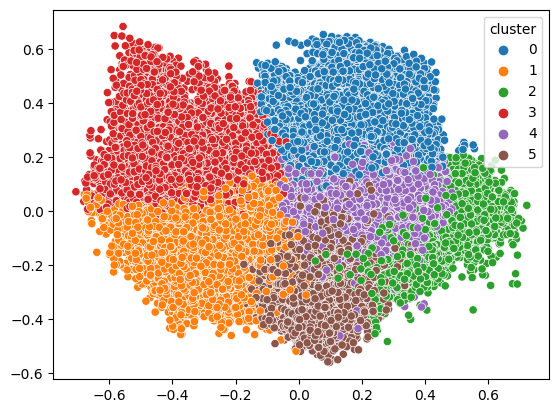

In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #Grafico de dos dimensiones
pca_fit = pca.fit_transform(df_norm) #Obtenemos los componentes principales

sns.scatterplot(x=pca_fit[:,0], y=pca_fit[:,1], hue=df_cluster.cluster, palette="tab10")